In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import requests
import time
import sys
import os
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint
sys.path.append('../')
from api_keys import sportsio_key
print(sportsio_key)

fd22e44264ab4828a2cfe860923da7f0


In [2]:
#Import the files

stats_df=pd.read_csv('Resources/raw.csv')
static_data=pd.read_csv('Resources/static_data.csv')

#merge the static data with yearly data 

stats_merged_df=pd.merge(stats_df, static_data, on='Player')

#Clean up the data by changing to float from int
stats_merged_df["DrAge"]=stats_merged_df["DrAge"].astype(float)
stats_merged_df["Rnd"]=stats_merged_df["Rnd"].astype(float)
stats_merged_df["Pick"]=stats_merged_df["Pick"].astype(float)
stats_merged_df.head()

,Player,player_year,season_year,Tm_x,Age,G,GS,Wins,Losses,Yds,TD,Y/A,Y/G,Rate,Salary,Rnd,Pick,DrAge,Tm_y,College/Univ
0,A.J. Feeley,1,2001,PHI,24.0,1.0,0.0,0.0,0.0,143.0,2.0,10.2,143.0,114.0,319325.0,5.0,155.0,24.0,PHI,Oregon
1,A.J. Feeley,2,2002,PHI,25.0,6.0,5.0,4.0,1.0,1011.0,6.0,6.6,168.5,75.4,389000.0,5.0,155.0,24.0,PHI,Oregon
2,A.J. Feeley,3,2004,MIA,27.0,11.0,8.0,3.0,5.0,1893.0,11.0,5.3,172.1,61.7,3455000.0,5.0,155.0,24.0,PHI,Oregon
3,A.J. Feeley,4,2006,PHI,29.0,2.0,0.0,0.0,0.0,342.0,3.0,9.0,171.0,122.9,1540000.0,5.0,155.0,24.0,PHI,Oregon
4,A.J. Feeley,5,2007,PHI,30.0,3.0,2.0,0.0,2.0,681.0,5.0,6.6,227.0,61.2,190588.0,5.0,155.0,24.0,PHI,Oregon


In [3]:
pprint(stats_merged_df.columns)
#Pick the columns we need to analyze
stats_merged_df1= stats_merged_df[["Player","Tm_x", "Wins","Losses", "Rate", "Salary","Rnd","Pick","DrAge","College/Univ"]].copy()

stats_merged_df1.head()

Index(['Player', 'player_year', 'season_year', 'Tm_x', 'Age', 'G', 'GS',
       'Wins', 'Losses', 'Yds', 'TD', 'Y/A', 'Y/G', 'Rate', 'Salary', 'Rnd',
       'Pick', 'DrAge', 'Tm_y', 'College/Univ'],
      dtype='object')


,Player,Tm_x,Wins,Losses,Rate,Salary,Rnd,Pick,DrAge,College/Univ
0,A.J. Feeley,PHI,0.0,0.0,114.0,319325.0,5.0,155.0,24.0,Oregon
1,A.J. Feeley,PHI,4.0,1.0,75.4,389000.0,5.0,155.0,24.0,Oregon
2,A.J. Feeley,MIA,3.0,5.0,61.7,3455000.0,5.0,155.0,24.0,Oregon
3,A.J. Feeley,PHI,0.0,0.0,122.9,1540000.0,5.0,155.0,24.0,Oregon
4,A.J. Feeley,PHI,0.0,2.0,61.2,190588.0,5.0,155.0,24.0,Oregon


In [4]:
#Group by Player

player_group=stats_merged_df1.groupby("Player")
years_played=player_group["Player"].count()


In [5]:
#Collect Stats per Player
player_summary=player_group.describe()
#Check the column type
player_summary.head()
#Next line is to remove limit on number of colujmns or rows to be displayed 
#pd.set_option("display.max_rows", None, "display.max_columns", None)


Wins                                                  Losses  \
              count      mean       std  min  25%   50%    75%   max  count   
Player                                                                        
A.J. Feeley     6.0  1.333333  1.751190  0.0  0.0   0.5   2.50   4.0    6.0   
A.J. McCarron   5.0  0.400000  0.894427  0.0  0.0   0.0   0.00   2.0    5.0   
Aaron Rodgers  16.0  7.875000  4.842520  0.0  5.5  10.0  11.25  14.0   16.0   
Alex Smith     14.0  7.071429  3.561855  2.0  5.0   6.5  10.50  13.0   14.0   
Andrew Luck     6.0  8.833333  3.544949  2.0  8.5  10.5  11.00  11.0    6.0   

                         ...   Pick        DrAge                               \
                   mean  ...    75%    max count  mean  std   min   25%   50%   
Player                   ...                                                    
A.J. Feeley    1.666667  ...  155.0  155.0   6.0  24.0  0.0  24.0  24.0  24.0   
A.J. McCarron  0.400000  ...  164.0  164.0   5.0  23.0  0.0  23.0  23.0  23.0   
Aaron Rodgers  3.937500  ...   24.0   24.0  16.0  21.0  0.0  21.0  21.0  21.0   
Alex Smith     4.785714  ...    1.0    1.0  14.0  21.0  0.0  21.0  21.0  21.0   
Andrew Luck    5.500000  ...    1.0    1.0   6.0  22.0  0.0  22.0  22.0  22.0   

                           
                75%   max  
Player                     
A.J. Feeley    24.0  24.0  
A.J. McCarron  23.0  23.0  
Aaron Rodgers  21.0  21.0  
Alex Smith     21.0  21.0  
Andrew Luck    22.0  22.0  

[5 rows x 56 columns]

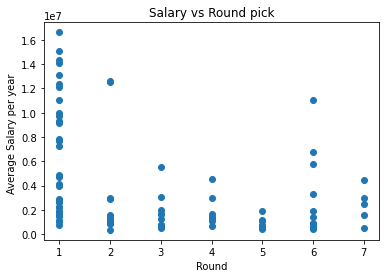

In [6]:
plt.scatter(player_summary["Rnd"]["mean"],player_summary["Salary"]["mean"])
plt.title("Salary vs Round pick")
plt.xlabel("Round")
ylim=(0, player_summary["Salary"]["mean"].max()+1000)
plt.ylabel("Average Salary per year ")
plt.show()

The correlation between both factors is 0.66


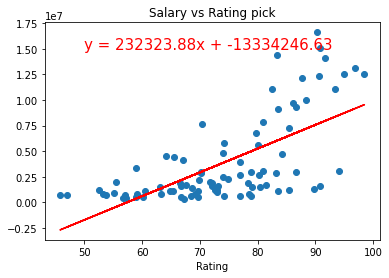

In [7]:
plt.scatter(player_summary["Rate"]["mean"],player_summary["Salary"]["mean"])
plt.title("Salary vs Rating pick")
plt.xlabel("Rating")
ylim=(0, player_summary["Salary"]["mean"].max()+1000)
(slope,intercept,rval,d,e,) = linregress(player_summary["Rate"]["mean"],player_summary["Salary"]["mean"])
regress_values = player_summary["Rate"]["mean"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(player_summary["Rate"]["mean"],regress_values,"r-")
plt.annotate(line_eq,(50,15000000),fontsize=15,color="red")
print(f"The correlation between both factors is {round(rval,2)}")
plt.show()

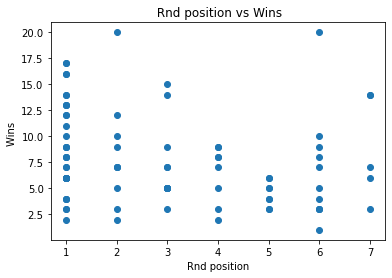

In [8]:
plt.scatter(player_summary["Rnd"]["mean"],player_summary["Wins"]["count"])
plt.title(" Rnd position vs Wins")
plt.xlabel("Rnd position")
ylim=(0, player_summary["Wins"]["count"].max())
plt.ylabel("Wins ")
plt.show()

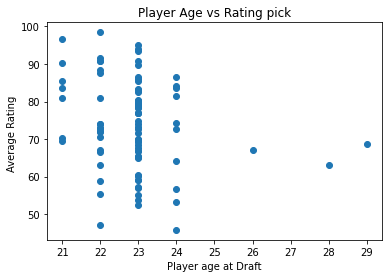

In [9]:
plt.scatter(player_summary["DrAge"]["mean"],player_summary["Rate"]["mean"])
plt.title("Player Age vs Rating pick")
plt.xlabel("Player age at Draft")
ylim=(0, player_summary["Rate"]["mean"].max())
plt.ylabel("Average Rating ")
plt.show()

In [10]:
#Group by Team


team_group=stats_merged_df1.groupby("Tm_x")
team_summary=team_group.describe()
#Check the column type

team_summary.head()

Wins                                                Losses            \
     count      mean       std  min  25%  50%   75%   max  count      mean   
Tm_x                                                                         
2TM    9.0  1.444444  3.609401  0.0  0.0  0.0  1.00  11.0    9.0  0.666667   
3TM    1.0  0.000000       NaN  0.0  0.0  0.0  0.00   0.0    1.0  0.000000   
ARI   28.0  2.250000  2.976762  0.0  0.0  1.0  3.00  13.0   28.0  2.178571   
ATL   32.0  4.625000  4.463110  0.0  0.0  4.0  8.00  13.0   32.0  4.750000   
BAL   28.0  4.142857  4.283597  0.0  0.0  3.0  8.25  12.0   28.0  3.750000   

      ...    Pick        DrAge                                               \
      ...     75%    max count       mean       std   min   25%   50%   75%   
Tm_x  ...                                                                     
2TM   ...  106.00  230.0   9.0  23.222222  1.986063  21.0  22.0  23.0  23.0   
3TM   ...  209.00  209.0   1.0  23.000000       NaN  23.0  23.0  23.0  23.0   
ARI   ...   97.50  213.0  28.0  22.785714  0.417855  22.0  23.0  23.0  23.0   
ATL   ...   75.00  152.0  32.0  22.656250  0.827331  21.0  23.0  23.0  23.0   
BAL   ...   78.75  180.0  28.0  22.714286  0.460044  22.0  22.0  23.0  23.0   

            
       max  
Tm_x        
2TM   28.0  
3TM   23.0  
ARI   23.0  
ATL   24.0  
BAL   23.0  

[5 rows x 56 columns]

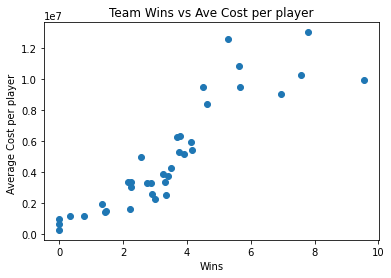

In [11]:
plt.scatter(team_summary["Wins"]["mean"],team_summary["Salary"]["mean"])
plt.title("Team Wins vs Ave Cost per player")
plt.xlabel("Wins")
ylim=(0, team_summary["Salary"]["mean"].max())
plt.ylabel("Average Cost per player ")
plt.show()